In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from IPython.display import display, Markdown

##Importando os dados e mostrando as 5 primeiras linhas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/refs/heads/master/datasets/housing/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Estatisticas Descritivas sobre o dataset

In [4]:
df.describe(include = "all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


###verificando os tipos das variaveis, numero de colunas e memoria usada

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


###verificando se tem valores ausentes

In [6]:
print(df.isnull().sum())
display(Markdown(
    "---\n"
    f"Sabemos assim que existem 207 valores faltantes na coluna total_bedrooms."))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


---
Sabemos assim que existem 207 valores faltantes na coluna total_bedrooms.

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
df.iloc[:, :] = imputer.fit_transform(df)

In [8]:
print(df.isnull().sum())
display(Markdown(
    "---\n"
    f"Utilizamos o SimpleImputer para usando a moda alterar os dados ausentes e deixar sem dados ausentes."))

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


---
Utilizamos o SimpleImputer para usando a moda alterar os dados ausentes e deixar sem dados ausentes.

#Verificando Duplicadas

removendo as duplicadas caso houver

In [9]:
duplicatas: int = df.duplicated().sum()
print(f"Número de duplicatas: {duplicatas}")
df = df.drop_duplicates()

Número de duplicatas: 0


#Verificando os tipos de ocean_proximity e a distribuição

Text(0.5, 0, '')

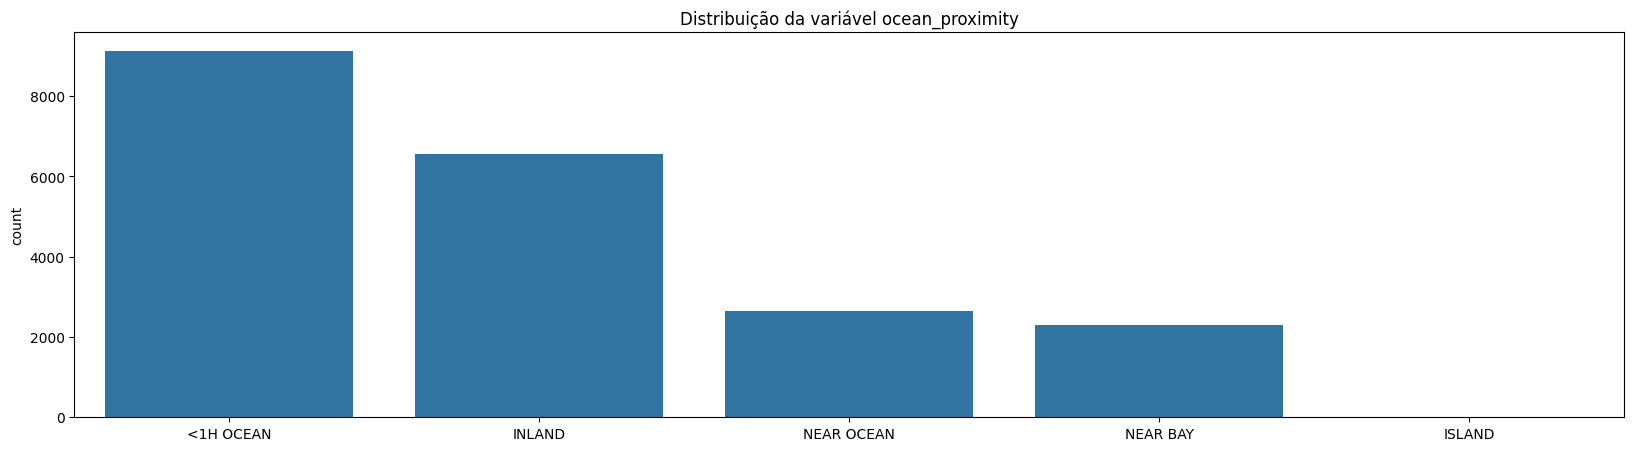

In [10]:
# Gráfico da variável ocean_proximity
fig, axes = plt.subplots(figsize=(20, 5))
contagem = df['ocean_proximity'].value_counts()
categorias_ordenadas = contagem.index
sns.countplot(x='ocean_proximity',data=df, ax=axes, order=categorias_ordenadas, color = '#1f77b4')
axes.set_title('Distribuição da variável ocean_proximity')
axes.set_xlabel('')

In [11]:
#quantidade por categoria
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


#Renda Mediana vs Preço Real da Casa

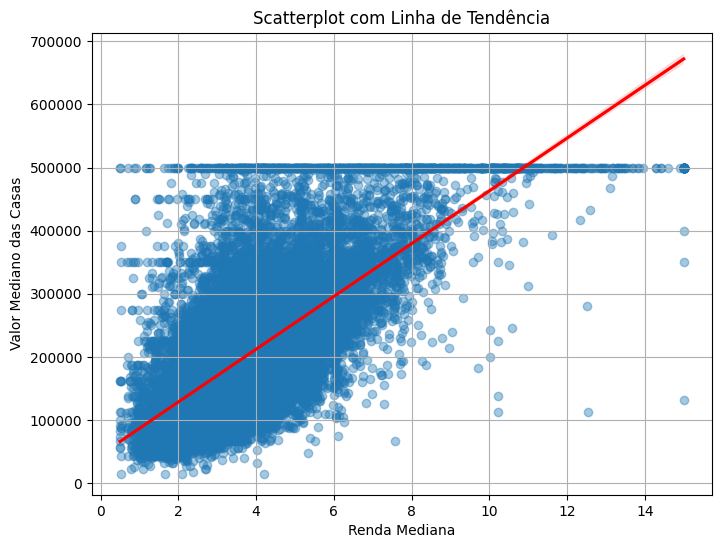

In [12]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="median_income", y="median_house_value", scatter_kws={"alpha": 0.4}, line_kws={"color": "red"})

plt.xlabel("Renda Mediana")
plt.ylabel("Valor Mediano das Casas")
plt.title("Scatterplot com Linha de Tendência")
plt.grid(True)
plt.show()


- podemos ver uma grande variedade de preço das casas para rendas a baixo de 5
- A linha vermelha mostra uma tendência crescente, o que indica que rendas mais altas estão associadas a valores medianos de casas mais altos. O que faz sentido, pois em áreas com maior renda, os imóveis costumam ser mais caros.

In [35]:
(df['median_house_value'] > 500001).sum()

np.int64(0)

### não temos imoveis acima de 500001 de preço

# Outliers Box plot

Text(0.5, 0, 'median_house_value')

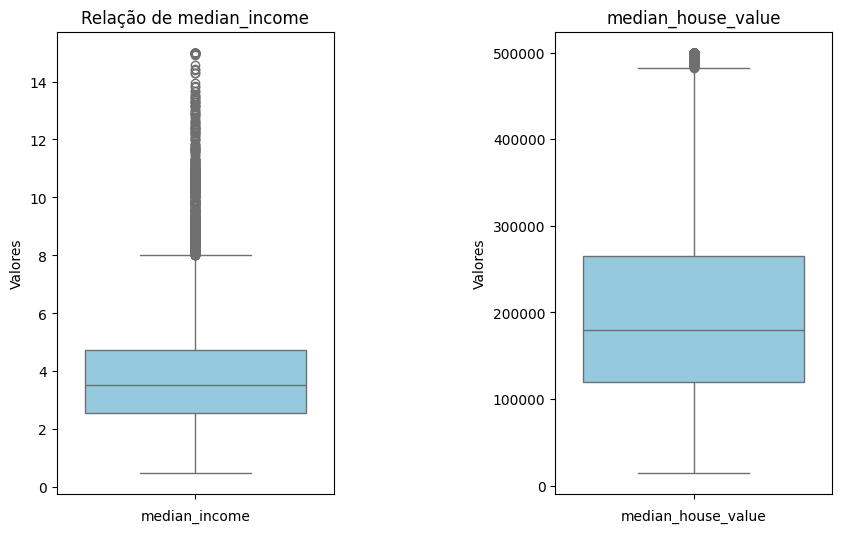

In [14]:
fig, axes = plt.subplots(1,2,figsize=(10, 6))
plt.subplots_adjust(wspace=0.8)
sns.boxplot(data=df, y='median_income', color='skyblue',ax = axes[0])
axes[0].set_title('Relação de median_income')
axes[0].set_ylabel('Valores')
axes[0].set_xlabel('median_income')
#
sns.boxplot(data=df, y='median_house_value', color='skyblue',ax = axes[1])
axes[1].set_title('median_house_value')
axes[1].set_ylabel('Valores')
axes[1].set_xlabel('median_house_value')

1. Em median_income temos muitos outliers
2. Em median_house_value temos menos mas também temos outliers
3. Os outliers de valores medios das casas são entre 48 - 50 mil
4. Os outliers de renda mediana são acima de 8 mil





## O que fazer com os outliers?

In [15]:
# Filtrando apenas as colunas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Calcular o IQR (Intervalo Interquartil) para as colunas numéricas
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = ((df_numerico < limite_inferior) | (df_numerico > limite_superior)).sum()
outliers

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,1287
total_bedrooms,1279
population,1196
households,1220
median_income,681
median_house_value,1071


### Para remover o impacto deles na hora de treinar realizaremos transormações neles

#Feito isso agora vamos separar o modelo para teste e para treino

In [16]:
#primeiramente vamos transformar usando one hot encoding a coluna ocean_proximity para podermos treinar o modelo
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

,Feature,Lasso Importance
7,median_income,74775.689132
1,latitude,52095.677773
0,longitude,51517.252558
5,population,42812.507851
4,total_bedrooms,41271.314028
8,ocean_proximity_INLAND,19192.479131
6,households,17996.260924
2,housing_median_age,13836.730260
3,total_rooms,11427.488749
9,ocean_proximity_ISLAND,2055.211758


<ipython-input-17-ff52bf0d8e5e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso_feature_importance["Feature"], y=lasso_feature_importance["Lasso Importance"], palette="magma")


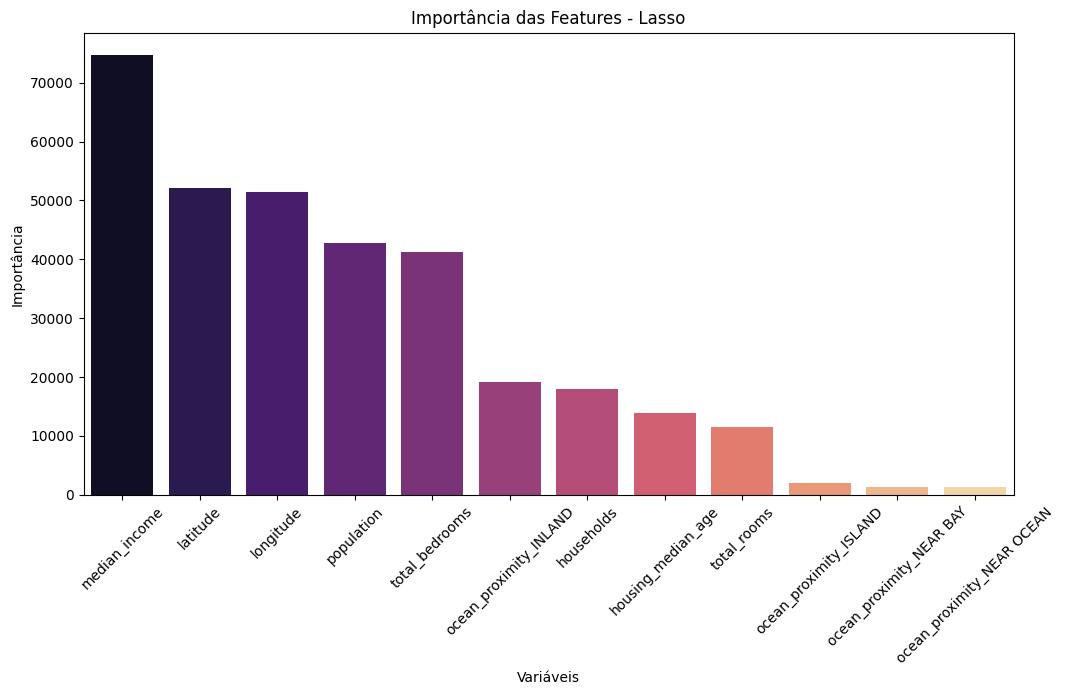

In [17]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar variáveis independentes (X) e dependente (y)
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados para o Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo Lasso com Cross-Validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Coeficientes do modelo Lasso
lasso_importance = np.abs(lasso.coef_)

# Criar DataFrame com os resultados
lasso_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Lasso Importance": lasso_importance
}).sort_values(by="Lasso Importance", ascending=False)

# Exibir a tabela
display(lasso_feature_importance)

# Plotar a importância das variáveis pelo Lasso
plt.figure(figsize=(12, 6))
sns.barplot(x=lasso_feature_importance["Feature"], y=lasso_feature_importance["Lasso Importance"], palette="magma")
plt.xticks(rotation=45)
plt.title("Importância das Features - Lasso")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()

,Feature,Random Forest Importance
7,median_income,0.490717
8,ocean_proximity_INLAND,0.140933
0,longitude,0.106093
1,latitude,0.101897
2,housing_median_age,0.052065
5,population,0.032511
4,total_bedrooms,0.023960
3,total_rooms,0.023412
6,households,0.018376
11,ocean_proximity_NEAR OCEAN,0.008793


<ipython-input-18-ddf9fd2ac992>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importance["Feature"], y=rf_feature_importance["Random Forest Importance"], palette="viridis")


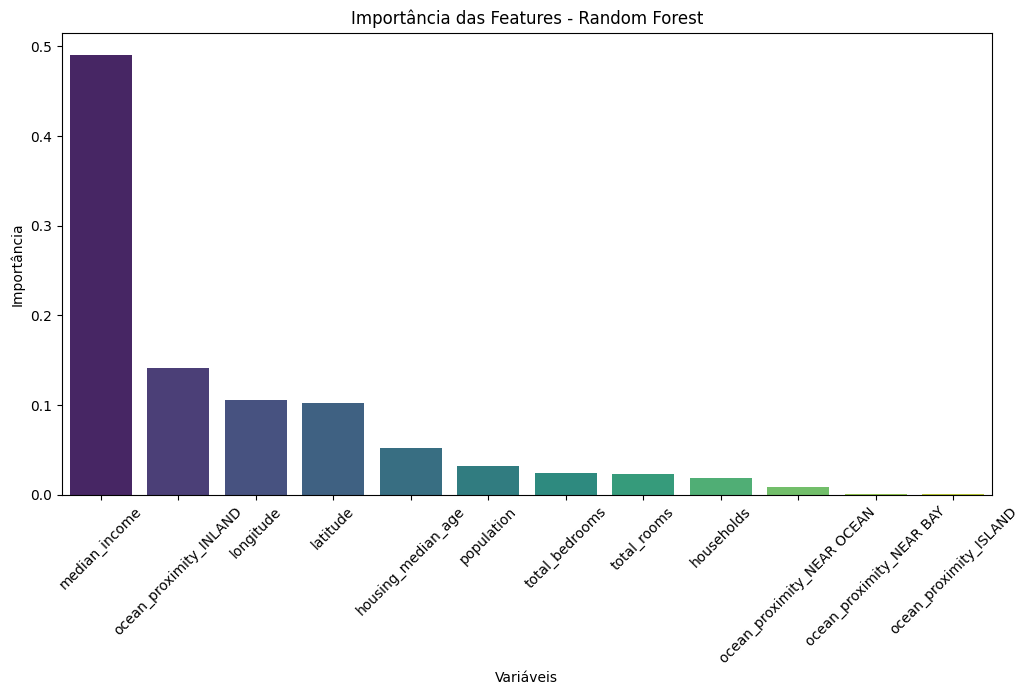

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importância das features no Random Forest
rf_importance = rf.feature_importances_

# Criar DataFrame com os resultados
rf_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Random Forest Importance": rf_importance
}).sort_values(by="Random Forest Importance", ascending=False)

# Exibir a tabela
display(rf_feature_importance)

# Plotar a importância das variáveis pelo Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_feature_importance["Feature"], y=rf_feature_importance["Random Forest Importance"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Importância das Features - Random Forest")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()


##Separar o modelo em teste e treino é importante, pois:
- é essencial para garantir que o modelo tenha uma avaliação honesta e precisa do seu desempenho, evitando problemas como overfitting
- fornece métricas de desempenho mais confiáveis, como acurácia, precisão, recall ou erro quadrático médio, dependendo do tipo de problema. Isso ajuda a avaliar a eficiência do modelo no cenário real.

In [19]:
# Manter apenas as colunas mais importantes
selected_features = ["median_income", "longitude", "latitude", "ocean_proximity_INLAND",]
df_selected = df[selected_features + ["median_house_value"]]  # Mantendo a variável alvo

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Criar escaladores
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Aplicar transformações
df_selected_standardized = pd.DataFrame(scaler_standard.fit_transform(df_selected), columns=df_selected.columns)
df_selected_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_selected), columns=df_selected.columns)
df_selected_log = df_selected.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
# Dados SEM Normalização
X = df_selected[selected_features]
y = df_selected["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(" Dados SEM Normalização:")
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras\n")

# Dados com Padronização (Z-score)
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standard, y, test_size=0.2, random_state=42)

print("Dados com Padronização (Z-score):")
print(f"Tamanho do conjunto de treino: {X_train_std.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test_std.shape[0]} amostras\n")

# Dados com Normalização Min-Max
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y, test_size=0.2, random_state=42)

print("Dados com Normalização Min-Max:")
print(f"Tamanho do conjunto de treino: {X_train_minmax.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test_minmax.shape[0]} amostras\n")

# Dados com Normalização Logarítmica
X_log = np.log1p(X)  # Aplicar log(1 + x) para evitar log(0)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)

print("Dados com Normalização Logarítmica:")
print(f"Tamanho do conjunto de treino: {X_train_log.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test_log.shape[0]} amostras\n")

 Dados SEM Normalização:
Tamanho do conjunto de treino: 14448 amostras
Tamanho do conjunto de teste: 6192 amostras

Dados com Padronização (Z-score):
Tamanho do conjunto de treino: 16512 amostras
Tamanho do conjunto de teste: 4128 amostras

Dados com Normalização Min-Max:
Tamanho do conjunto de treino: 16512 amostras
Tamanho do conjunto de teste: 4128 amostras

Dados com Normalização Logarítmica:
Tamanho do conjunto de treino: 16512 amostras
Tamanho do conjunto de teste: 4128 amostras



/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [22]:
#treinando o modelo usando regressão linear e mostrando algumas metricas de avaliação
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"R²: {r2}")

Erro Quadrático Médio (MSE): 5271998590.547468
R²: 0.598336191087647


##Agora vamos treinar o modelo apenas com as variaveis da questão 4

In [23]:
X = df.drop(columns=['median_house_value', 'median_income', 'housing_median_age', 'households'])
y = df['median_house_value']

# Divisão de 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treinamento: 14448
Tamanho do conjunto de teste: 6192


In [24]:
#treinando o modelo usando regressão linear e mostrando algumas metricas de avaliação
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"R²: {r2}")

Erro Quadrático Médio (MSE): 7843198210.057168
R²: 0.4024412539194234


##o que aconteceu com o desempenho do modelo ao usar apenas uma seleção de variáveis? Foi melhor ou pior do que o modelo que usava todas as variáveis?

### O desempenho piorou, mas não tenho certeza se foi realmente por conta do menor numero de features acho que foi por conta das features escolhidas para remover, por exemplo median_income que é importante para prever a median_house_value

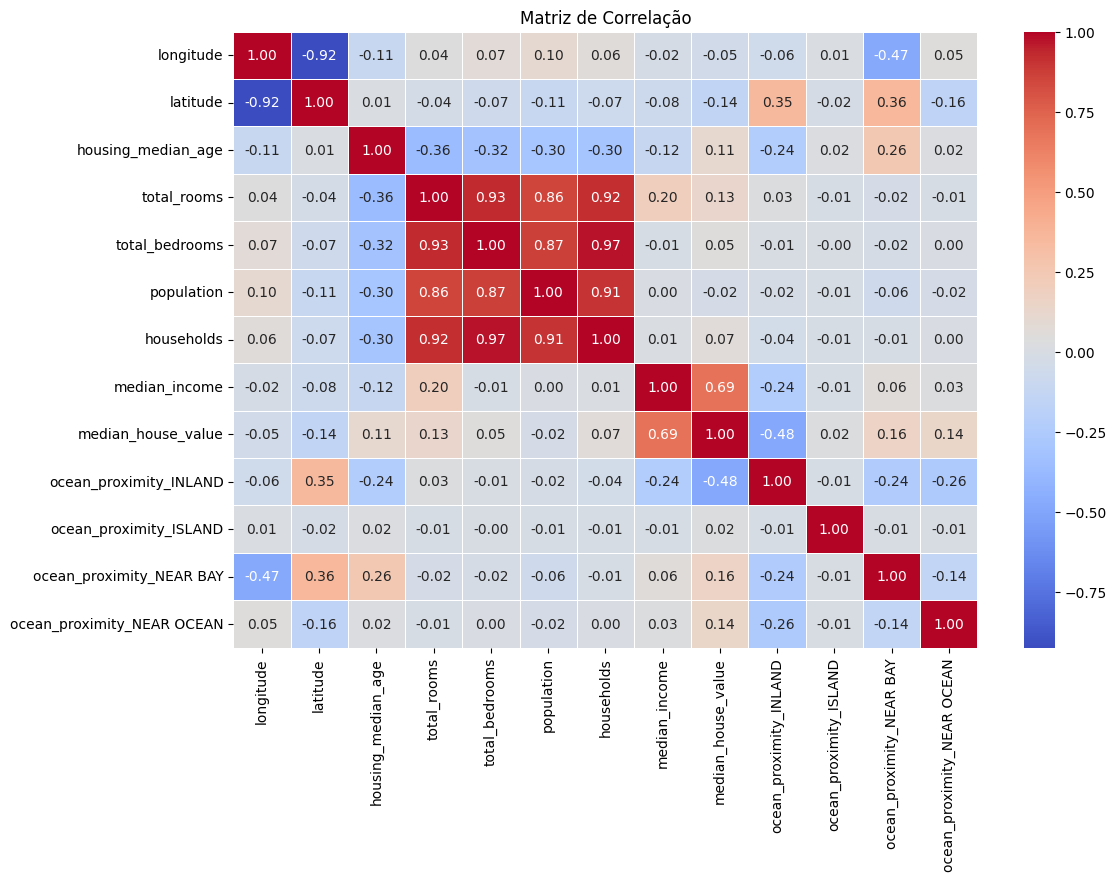

---
Como podemos ver median_income tem 69% de correlação com median_house_value portanto ao remove-lo do treinamento é notorio a queda do R^2 e MSE.

In [25]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Exibir a matriz de correlação com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()
display(Markdown(
    "---\n"
    f"Como podemos ver median_income tem 69% de correlação com median_house_value portanto ao remove-lo do treinamento é notorio a queda do R^2 e MSE."))

## implemente uma Árvore de Decisão para prever o valor mediano das casas (median_house_value). Compare o desempenho da Árvore de Decisão com o desempenho do modelo de Regressão Linear usando a métrica Erro Médio Absoluto (MAE).

In [26]:
from sklearn.tree import DecisionTreeRegressor


# Dicionário para armazenar os resultados
resultados_dt = {}

#  Árvore de Decisão - Dados SEM Normalização
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

resultados_dt["Sem Normalização"] = (rmse_dt, r2_dt)

#  Árvore de Decisão - Dados com Padronização (Z-score)
dt_std = DecisionTreeRegressor(random_state=42)
dt_std.fit(X_train_std, y_train_std)
y_pred_dt_std = dt_std.predict(X_test_std)

rmse_dt_std = np.sqrt(mean_squared_error(y_test_std, y_pred_dt_std))
r2_dt_std = r2_score(y_test_std, y_pred_dt_std)

resultados_dt["Padronização (Z-score)"] = (rmse_dt_std, r2_dt_std)

#  Árvore de Decisão - Dados com Normalização Min-Max
dt_minmax = DecisionTreeRegressor(random_state=42)
dt_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_dt_minmax = dt_minmax.predict(X_test_minmax)

rmse_dt_minmax = np.sqrt(mean_squared_error(y_test_minmax, y_pred_dt_minmax))
r2_dt_minmax = r2_score(y_test_minmax, y_pred_dt_minmax)

resultados_dt["Normalização Min-Max"] = (rmse_dt_minmax, r2_dt_minmax)

#  Árvore de Decisão - Dados com Normalização Logarítmica
dt_log = DecisionTreeRegressor(random_state=42)
dt_log.fit(X_train_log, y_train_log)
y_pred_dt_log = dt_log.predict(X_test_log)

rmse_dt_log = np.sqrt(mean_squared_error(y_test_log, y_pred_dt_log))
r2_dt_log = r2_score(y_test_log, y_pred_dt_log)

resultados_dt["Normalização Logarítmica"] = (rmse_dt_log, r2_dt_log)

# Criar um DataFrame para visualizar os resultados
df_resultados_dt = pd.DataFrame.from_dict(
    resultados_dt, orient="index", columns=["RMSE", "R²"]
).sort_values(by="RMSE")

# Exibir os resultados organizados
print("\nComparação da Árvore de Decisão com Diferentes Normalizações:")
print(df_resultados_dt)



Comparação da Árvore de Decisão com Diferentes Normalizações:
                                  RMSE        R²
Normalização Min-Max      62138.078206  0.705348
Padronização (Z-score)    62179.927773  0.704951
Sem Normalização          74276.524372  0.579670
Normalização Logarítmica  92385.579336  0.348669


 ### implemente uma Random Forest para prever o valor mediano das casas (median_house_value).

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Dicionário para armazenar os resultados
resultados_rf = {}

# Random Forest - Dados SEM Normalização
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

resultados_rf["Sem Normalização"] = (rmse_rf, r2_rf)

# Random Forest - Dados com Padronização (Z-score)
rf_std = RandomForestRegressor(n_estimators=100, random_state=42)
rf_std.fit(X_train_std, y_train_std)
y_pred_rf_std = rf_std.predict(X_test_std)

rmse_rf_std = np.sqrt(mean_squared_error(y_test_std, y_pred_rf_std))
r2_rf_std = r2_score(y_test_std, y_pred_rf_std)

resultados_rf["Padronização (Z-score)"] = (rmse_rf_std, r2_rf_std)

# Random Forest - Dados com Normalização Min-Max
rf_minmax = RandomForestRegressor(n_estimators=100, random_state=42)
rf_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_rf_minmax = rf_minmax.predict(X_test_minmax)

rmse_rf_minmax = np.sqrt(mean_squared_error(y_test_minmax, y_pred_rf_minmax))
r2_rf_minmax = r2_score(y_test_minmax, y_pred_rf_minmax)

resultados_rf["Normalização Min-Max"] = (rmse_rf_minmax, r2_rf_minmax)

# Random Forest - Dados com Normalização Logarítmica
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_log.fit(X_train_log, y_train_log)
y_pred_rf_log = rf_log.predict(X_test_log)

rmse_rf_log = np.sqrt(mean_squared_error(y_test_log, y_pred_rf_log))
r2_rf_log = r2_score(y_test_log, y_pred_rf_log)

resultados_rf["Normalização Logarítmica"] = (rmse_rf_log, r2_rf_log)

# Criar um DataFrame para visualizar os resultados
df_resultados_rf = pd.DataFrame.from_dict(
    resultados_rf, orient="index", columns=["RMSE", "R²"]
).sort_values(by="RMSE")

# Exibir os resultados organizados
print("\nComparação do Random Forest com Diferentes Normalizações:")
print(df_resultados_rf)



Comparação do Random Forest com Diferentes Normalizações:
                                  RMSE        R²
Normalização Min-Max      48132.410518  0.823206
Padronização (Z-score)    48190.459155  0.822779
Sem Normalização          52206.520161  0.792348
Normalização Logarítmica  72452.165400  0.599414
